# Laboratorio 2

Integrantes: 

    - Francis Aguilar - 22243 
    - Diego García - 22404 
    - Angela García -22869 

Enlace al repositorio: https://github.com/angelargd8/lab2-modsim


# Ejercicio 1 - Retardos de primer orden y sistemas lineales

# Ejercicio 2 - Retroalimentación Retrasada y Oscilaciones

### Teoría
**1. Explique cómo los retrasos en la percepción causan oscilaciones (p. ej., analogía del termostato).** 

Los retrasos en la percepción pueden causar oscilaciones, ya que en un sistema dinámico si un agente percibe con retardo el estado actual de una variable, entonces las acciones que toma están basadas en la información desactualizada. Por lo tanto, lo que provoca es sobrecompensación, correcciones excesivas o tardías. Por eso en los sistemas cuando responden a información desfasada tienden al sobre ajuste que causa oscilaciones.


**2. Deduzca por qué bucles de equilibrio + retrasos → sobreimpulso/insuficiencia.**

Un bucle equilibrado es un mecanismo que corrige desviaciones para mantener una variable cerca de un objetivo y cuando hay retraso el sistema actua con la información pasada y da un sobreimpulso o insuficiencia porque el sistema aún cree que falta correguir, entonces sigue actuando, peromo como la acción ya estaba teniendo efecto lo lleva a tener una corrección y se pasa del objetivo o insuficiencia porque da una corrección muy pequeña, entonces no llega al objetivo. 

La deducción sería:
$$
\frac{dx(t)}{dt} = \text{K} * (x^* - x(t-τ_p))
$$

en donde:
$$
x(t):\text{estado actual del sistema} 
x^*:\text{objetivo o set point} 
τ:\text{retraso en la percepción} 
K:\text{ganancia del controlador} 
$$

Entonces cuando:
$$
x(t-τ)<x^*
$$
el sistema actúa como si aún estuviera por debajo del objetivo que es un sobreimpulso

Y cuando finalmente :
$$
x(t)> x^*
$$
es cuando el sistema aún no lo ve que es una oscilación



**3. Analice y discuta ejemplos reales (ciclos económicos, respuestas a pandemias)**

Un ejemplo real como respuestas a pandemia, como el covid-19. El retraso puede ser los casos detectado por días o semanas después, por todo lo que conlleva la prueba y los reportes. Entonces, al tener algo de retraso en los reportes, las políticas tardan en aplicarse, entonces las medidas no tienen un efecto inmediato.

Por ejemplo en los gobiernos al subestimar la gravedad responden tarde y para compensar impone medidas muy fuertes lo que hace que los casos bajen. Pero al relajar las medidas muy pronto los casos vuelven a subir, lo que genera un ciclo de olas epidémicas, que son las oscilaciones.

Un ejemplo, en mundo como se vió la pandemia fue: 
1. primera ola, en donde crecio rápido y sin preparación
2. respuesta tardía y fuerte, que hubo un confinamiento total
3. los casos bajaron y hubo un alivio prematuro a las medidas
4. segunda ola, por apertura acelerada
6. nuevo confinamiento


**4. Para una acción con un objetivo de 100 y un retraso en la percepción de 20 días:**

**a. Prediga la magnitud del sobreimpulso si el retraso del ajuste es de 10 días**

$$
x^* - \text{Objetivo : 10} 
$$
$$
τ_p - \text{ Retraso en la percepcion: 20} 
$$
$$
τ_a - \text{ Retraso en el ajuste: 10} 
$$


$$
\frac{dx(t)}{dt} = \text{K} * (x^* - x(t-τ_p))
$$

Ya que 
$$
x < 100
$$


La estimación simplificada del sobreimpulso sería:

$$
\text{S} \approx K \cdot \Delta x \cdot e^{λ (τ_p + τ_a)}
$$

en donde 

$$
\Delta x : (x^* - x_0) \text{ que es el error inicial}

$$
$$
λ: \text{constante de sensibilidad del sistema}
$$

$$
e^{λ (τ_p + τ_a)} : \text{magnificación del error por el retardo acumulado}
$$

Colocando todo en la formula:
$$
\text{S} \approx  1 \cdot 50 x \cdot e^{1.5}
\text{S} =  224
$$

El resultado demuestra una corrección exesiva de 224, cuando realmente solo se necesitaban 50.



**b. ¿Cómo podría una recopilación más rápida de datos reducir las oscilaciones de las políticas?**

Definitivamente una recopilación más rápida de datos reduce las oscilaciones de las políticas, por lo anteriormente hablado ya que disminuye el retardo en la percepción, ya que los datos son más recientes, las deciciones se basan en el estado actual y no en lo que paso días antes o semanas antes .Entonces, permite tomar decisiones más precisas. 



### Práctica

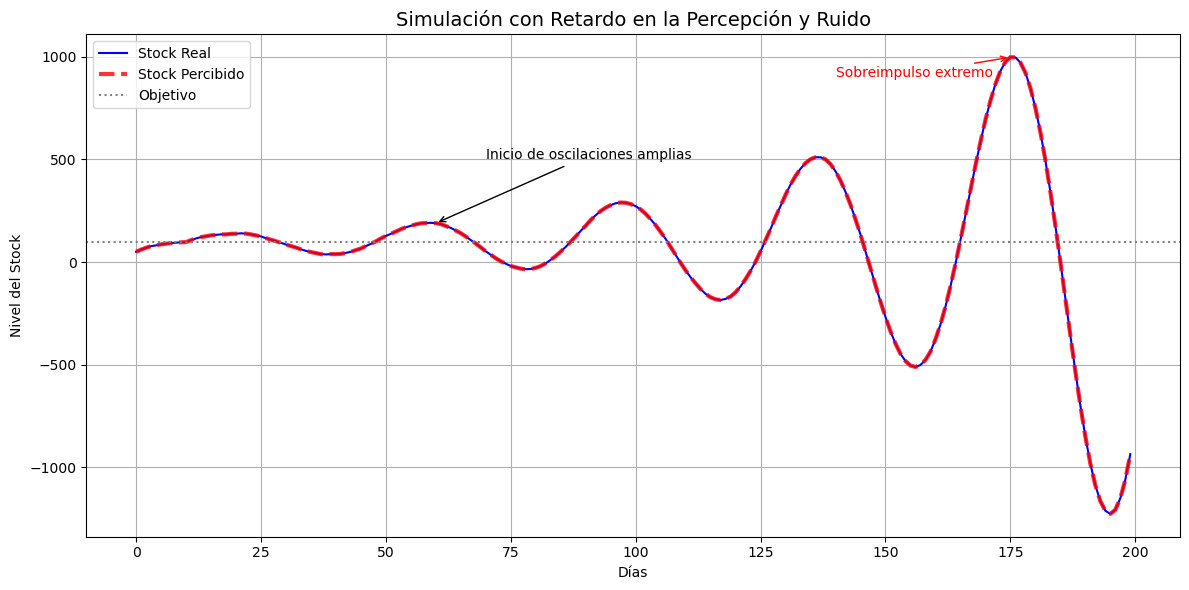

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import ace_tools_open as tools

#crear un modelo con retrasos de percepcion y visualice las oscilaciones
#crear un stock real que se ajusta a un objetivo
#crear un stock percibido con retrasos
#usar el stock para retroalimentacion (flujo = ( objetivo - percibido) / retraso)
#add ruido a la percepcion y observar su escalabilidad
stock_real = [50]
stock_percibido = [50]
dias = 200 
#los dias de retraso
retraso_percepcion = 10 
retraso_ajuste=5
ruido_amplitud = 5
#ganancia
K= 1
objetivo= 100
#simular con los 200 dias
for t in range(1, dias):

    #percepcion retrasada + ruido
    if len(stock_percibido) <= retraso_percepcion:
        percepcion = stock_percibido[-1] + np.random.normal(0, ruido_amplitud)
    else:
        percepcion = stock_percibido[-(retraso_percepcion + 1)] + np.random.normal(0, ruido_amplitud)
    
    #retroalimentacion (flujo = ( objetivo - percibido) / retraso)
    flujo = K * (objetivo - percepcion) / retraso_ajuste

    #actualizar el real
    nuevo_stock=stock_real[-1] + flujo
    stock_real.append(nuevo_stock)

    #actualizar el percibido
    stock_percibido.append(nuevo_stock)



stock_percibido_plot = stock_percibido[-dias:]

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(stock_real, label="Stock Real", linewidth=1.5, color ="blue")
plt.plot(stock_percibido_plot, label="Stock Percibido", linestyle='--', alpha=0.8, color ="red", linewidth=3)
plt.axhline(objetivo, color='gray', linestyle=':', label="Objetivo")
plt.title("Simulación con Retardo en la Percepción y Ruido", fontsize=14)
# plt.fill_between(range(dias), stock_real, stock_percibido_plot, color='blue', alpha=0.5, label='Diferencia Real vs Percibida')
plt.annotate("Inicio de oscilaciones amplias", xy=(60, stock_real[60]), xytext=(70, 500),
             arrowprops=dict(arrowstyle="->", color="black"),
             fontsize=10, color="black")
plt.annotate("Sobreimpulso extremo", xy=(175, stock_real[175]), xytext=(140, 900),
             arrowprops=dict(arrowstyle="->", color="red"),
             fontsize=10, color="red")
plt.xlabel("Días")
plt.ylabel("Nivel del Stock")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Lo que se puede observar en el gráfico es que existen varias oscilaciones, que en un principio no se ve tan bien, pero luego de los 60 días, las oscilaciones comienzan a ser más grandes y donde definitivamente las oscilaciones se nota demasiado el sobreimpulso es luego de las 175 días.

# Ejercicio 3 - Sistemas no lineales y modelado SIR

# Referencias: 
